In [26]:
import cv2
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import random

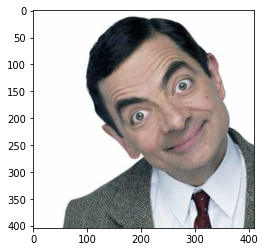

In [28]:
img = plt.imread('mrbin.jpg')
plt.imshow(img)

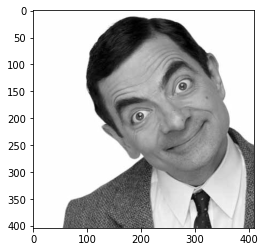

In [29]:
image = cv2.imread('mrbin.jpg',0)
rows, cols = image.shape
plt.imshow(image, cmap='gray')

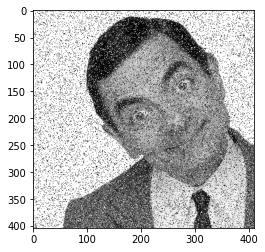

In [30]:
for i in range(rows):
    for j in range(cols):
        mylist = [0,1]
        r = random.choices(mylist, weights = [8, 2])[0]
        if  r== 1:
            image[i][j] = random.choices([0,255])[0]
            
plt.imshow(image, cmap='gray')

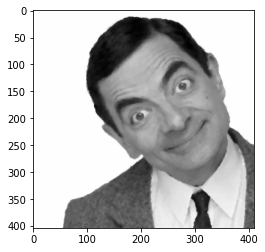

In [31]:
median_image = cv2.medianBlur(image, ksize=5)
plt.imshow(median_image, cmap='gray')

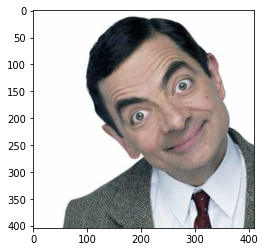

In [32]:
img = plt.imread('mrbin.jpg')
plt.imshow(img)

In [33]:
face_detector = MTCNN()

In [22]:

def draw_facebox_and_keypoints(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()

    print(result_list)

    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        ax.add_patch(rect)
       
        for key, value in result['keypoints'].items():
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
           
    plt.show()

In [34]:
results = face_detector.detect_faces(img)
results

1/1 [==============================] - 0s 215ms/step


[{'box': [148, 77, 200, 225],
  'confidence': 0.9990617632865906,
  'keypoints': {'left_eye': (200, 189),
   'right_eye': (272, 143),
   'nose': (264, 215),
   'mouth_left': (245, 255),
   'mouth_right': (314, 213)}}]

[{'box': [148, 77, 200, 225], 'confidence': 0.9990617632865906, 'keypoints': {'left_eye': (200, 189), 'right_eye': (272, 143), 'nose': (264, 215), 'mouth_left': (245, 255), 'mouth_right': (314, 213)}}]


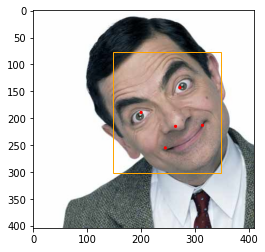

In [35]:
draw_facebox_and_keypoints('mrbin.jpg', results)

In [40]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [39]:
def alignment_procedure(img, left_eye, right_eye):
    
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye
   
    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 
  
    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))
    
    if b != 0 and c != 0: 

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) 
        angle = (angle * 180) / math.pi 
       
        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))
   
    return img 

In [37]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

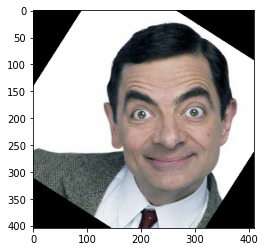

In [38]:
plt.imshow(img)